# Diferenciální rovnice pro pokročilejší

Pokročilejší dovedností je například odhalení, jak se rovnice chová při změně parametru.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

In [37]:
pocatecni_podminka = [0.1]
meze = [0,10]
lovy = [0,0.2,0.4]

def rovnice(t, x, h=0):
    """
    Logistický růst a lov konstantním úsilím, tj za jednotku času se loví stále stejné procento populace.
    """
    r = 1
    K = 1
    return r*x*(1-x/K) - h*x

In [38]:
reseni = [solve_ivp(
                rovnice,
                meze,
                pocatecni_podminka,
                dense_output=True,
                args = [lov]
                   ).sol 
          for lov in lovy ]
reseni

In [39]:
t=np.linspace(*meze, 100)  # graf reseni
df = pd.DataFrame([r(t)[0] for r in reseni]).T
df.columns = lovy
df["t"] = t
df

,0.0,0.2,0.4,t
0,0.100000,0.100000,0.100000,0.00000
1,0.109465,0.107288,0.105153,0.10101
2,0.119702,0.115018,0.110513,0.20202
3,0.130753,0.123204,0.116081,0.30303
4,0.142664,0.131863,0.121861,0.40404
...,...,...,...,...
95,0.999297,0.797415,0.590703,9.59596
96,0.999345,0.797608,0.591242,9.69697
97,0.999398,0.797787,0.591750,9.79798
98,0.999455,0.797953,0.592229,9.89899


<AxesSubplot: xlabel='t'>

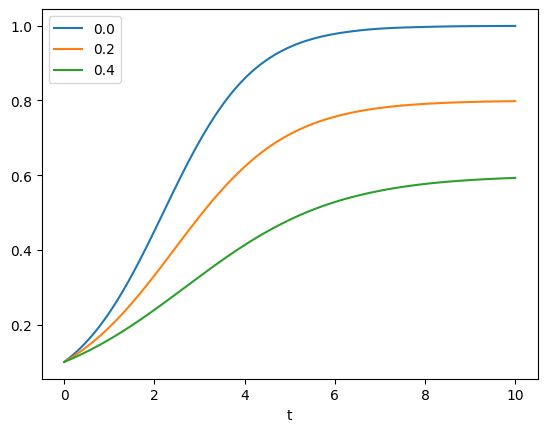

In [40]:
fig,ax = plt.subplots(1)
df.plot(ax=ax, x="t")

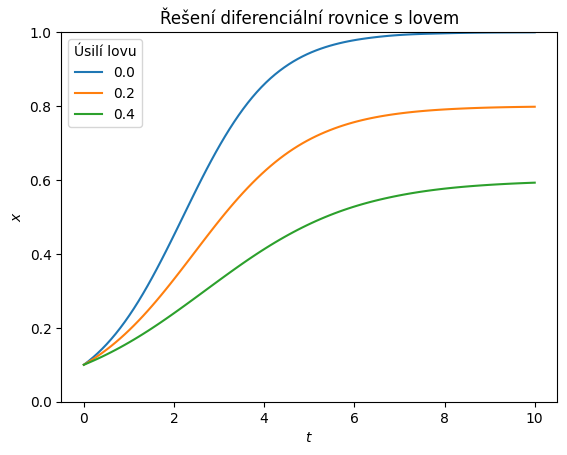

In [41]:
ax.set(
    ylim = (0,1),
    title = "Řešení diferenciální rovnice s lovem",
    xlabel=r"$t$",
    ylabel=r"$x$",
)
ax.legend(title="Úsilí lovu")
fig